# Part 6.2 - Analysis Topic Model of Train Set
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import sys, gc
sys.path.insert(0, '../utils')
from utils import filter_topics, plot_topics, plot_wordcloud, plot_heatmap, plot_avg
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)

from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
sns.axes_style("darkgrid")
%matplotlib inline
dpi=80

import datetime
print (datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

2019-02-03 17:22:02


**For computing resource limitation, we did not train the full dataset, but trained a random sampling dataset (train set). In this part, we will use the topic modeling result from part 6.1 to analyze the train set making a general analysis.** 

**To evaluate and compare the distribution of topics, we use two basic metrics, in practice we use both to find interesting topics:**
1. The dominant topic counts. 

    Every document has a dominant topic represent the most portion of its contents. By summing the number of each dominant topic in a range of time, we see the variety and trend of each topic over time. It is easy to understand and fit for scatter plot, but in this way it ignores  non-dominant topics.

1. The average weight of topics over time.

    This metric is the average weight of a topic through all documents in a range of time, it avoid the issue above, reflect the topic variety and trend over time. However, it might give a frequent/normal topic (which has a small weight in each document) a high weight because the topic appears in large number of documents, when sum all weights of each topic and divid by total weight of all topics, this normal topic may get a high weight.
    

**To visualize the topics, we use all or part of below plots:**

1. word cloud to display topic words.

1. Scatter plot to dispaly the dominant tpics distribution over time.

1. Bar chart to display the dominant topics count over time.

1. Point plot to display the average topic weight over time.

## 1 Load dataframes

**Load the processed dataframes:**
* `topicKeys.txt`: topic words list
* `domTopic.csv`: document dominant topics dataframe
* `avgWeight.csv`: average topic weight dataframe

**Topics List:**

In [2]:
path = r'../models/train/topicKeys.txt'

df_topics = (pd.read_table(path, 
                           header=None, 
                           index_col=None, 
                           names = ['topic_', 'weight_', 'keywords_'],
                           encoding='utf8')
             .sort_values(by='topic_')
             .reset_index(drop=True))

topics_shape = df_topics.shape

In [3]:
print('Shape of dataframe:', topics_shape)
df_topics.head()

Shape of dataframe: (200, 3)


topic_  weight_  \
0       0  0.00657   
1       1  0.01074   
2       2  0.02215   
3       3  0.00384   
4       4  0.00901   

                                                                                                                 keywords_  
0  train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...  
1  prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...  
2   time good year made great present work years fact number past season week large make place success doubt interest ago   
3  plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...  
4  found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...

**Docmument - dominant topics dataframe:**

In [4]:
path = r'../models/train/domTopics.csv'

df_domtopic = pd.read_csv(path, 
                          header=None, 
                          index_col=None, 
                          names = ['id', 'region', 'year', 'topic', 'weight', 'keywords_'],
                          dtype={2:'str'},
                          encoding='utf8').sort_values(by='id').reset_index(drop=True)

# short keywords for easy plot
df_domtopic['keywords'] = df_domtopic['keywords_'].str.slice(0,60)+'...'
df_domtopic.drop("keywords_", axis=1, inplace=True)

In [5]:
print('Shape of dataframe:', df_domtopic.shape)
df_domtopic.sample(5)

Shape of dataframe: (3025602, 6)


id      region  year  topic    weight  \
1191199  12999494  Canterbury  1894      1  0.874361   
2755762  28377482    Auckland  1895    111  0.717524   
761712    8530678    Gisborne  1893    116  0.674023   
1924054  19015573  Wellington  1925    153  0.560819   
965865   10864948    Gisborne  1901     51  0.436677   

                                                                keywords  
1191199  prices advertisements column suit latest ladies suits made s...  
2755762  race yds prize yards handicap time sports club won events se...  
761712   tea teas tobacco advertisements column coffee pure quality c...  
1924054  company miss opera theatre orchestra night house music seaso...  
965865   south africa boers british war general transvaal contingent ...

**Average topic weight dataframe:**

In [6]:
path = r'../models/train/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

# short keywords for easy plot
df_avgweight['keywords'] = df_avgweight['keywords_'].str.slice(0,60)+'...'
df_avgweight.drop("keywords_", axis=1, inplace=True)

df_topics.columns = ['topic', 'weight', 'keywords']

In [7]:
print('Shape of dataframe:', df_avgweight.shape)
df_avgweight.sample(5)

Shape of dataframe: (20800, 4)


year  topic    weight  \
17509  1929    109  0.000657   
12992  1903    192  0.002208   
5962   1868    162  0.006111   
10707  1892    107  0.000635   
338    1840    138  0.000110   

                                                              keywords  
17509  gisborne road bay gladstone poverty lowe herald ormond peel ...  
12992  timber building pine feet iron cement mills kauri doors buil...  
5962   gold claim dredge mining river dredging creek company ground...  
10707  rooms house price good land roomed water terms section sale ...  
338    teeth prizes prize dental horse dentist drawing tickets divi...

## 2 The Most Distinct Documents

**First of all, check the document with the highest weight topic through all documents, which means the document contains the fewest topics, easy to check the topic by eyes. Most this kind of documents are oversimplified, but it is a simple way to check topics. Here we print the top one of them.**

In [8]:
df_domtopic.sort_values(by='weight', ascending=False).head(3)

id      region  year  topic    weight  \
535348    6372843       Otago  1867    120  0.999138   
1912609  18941473  Wellington  1938     20  0.999018   
1911589  18935422  Wellington  1938     20  0.998958   

                                                                keywords  
535348   ounce exceeding half epps postage post letters cocoa breakfa...  
1912609  auckland wellington left due london lyttelton october sydney...  
1911589  auckland wellington left due london lyttelton october sydney...

In [9]:
id_ = df_domtopic.sort_values(by='weight', ascending=False).iloc[0]['id']
id_

6372843

In [10]:
%%bash -s $id_

echo 'Print 2000 characters of document id: '$1
grep -nw ../data/dataset/sample/train/train.csv -e $1 | cut -c1-2000

Print 2000 characters of document id: 6372843
535349:6372843	RATES OF POSTAGE CHARGEABLE IN NEW ZEALAND ON LETTERS ADDRESSED TO PLACES BEYOND THE COLONY.	"RATES OF POSTAGE CHARGEABLE IN NEW ZEALAND ON LETTERS ADDRESSED TO PLACES BEYOND THE COLONY.(BREPAYMESTP COMPULSORY.)ffeU** Letters not specially directed by a j)articular route, will, if sufficiently prepaid, be sent by .the first route given in 'this table:—Africa (West Coast), via Panama, not half ounce ...10 Africa (West Coast), via Suez, not exceeding half ounce ' ... 1 0 Africa (West Coast), via Suez and Marseilles, not exceeding half • . ounce .. j 4 Alexandria, via Suez, not exceeding half ounce ■.° 0 6 Algeria, via Panama, not exceeding half ounce ... 1 2 Algeria, via Suez, not exceeding haif ounce ... 1 4 Ascension, via Panama, not exceeding half ounce .° \\ g Ascension, via Suez, not exceeding half ounce , - ... 1 6 Ascension, via Suez and Marseilles, not exceeding half ouuee ' ... 1 10 I Ascension, via Mauritius, not exee

## 3 General Distribution of Topics

### 3.1 Word Cloud

**Since MALLET outputs topic keywords without weight of each keywords, so we will add sequential weight (like arithmetic progression) for each keywords, which means the weight of each keywords is not accurate, but for word cloud it is acceptable. Below plot shows the highest weight 20 topics in topics list.**

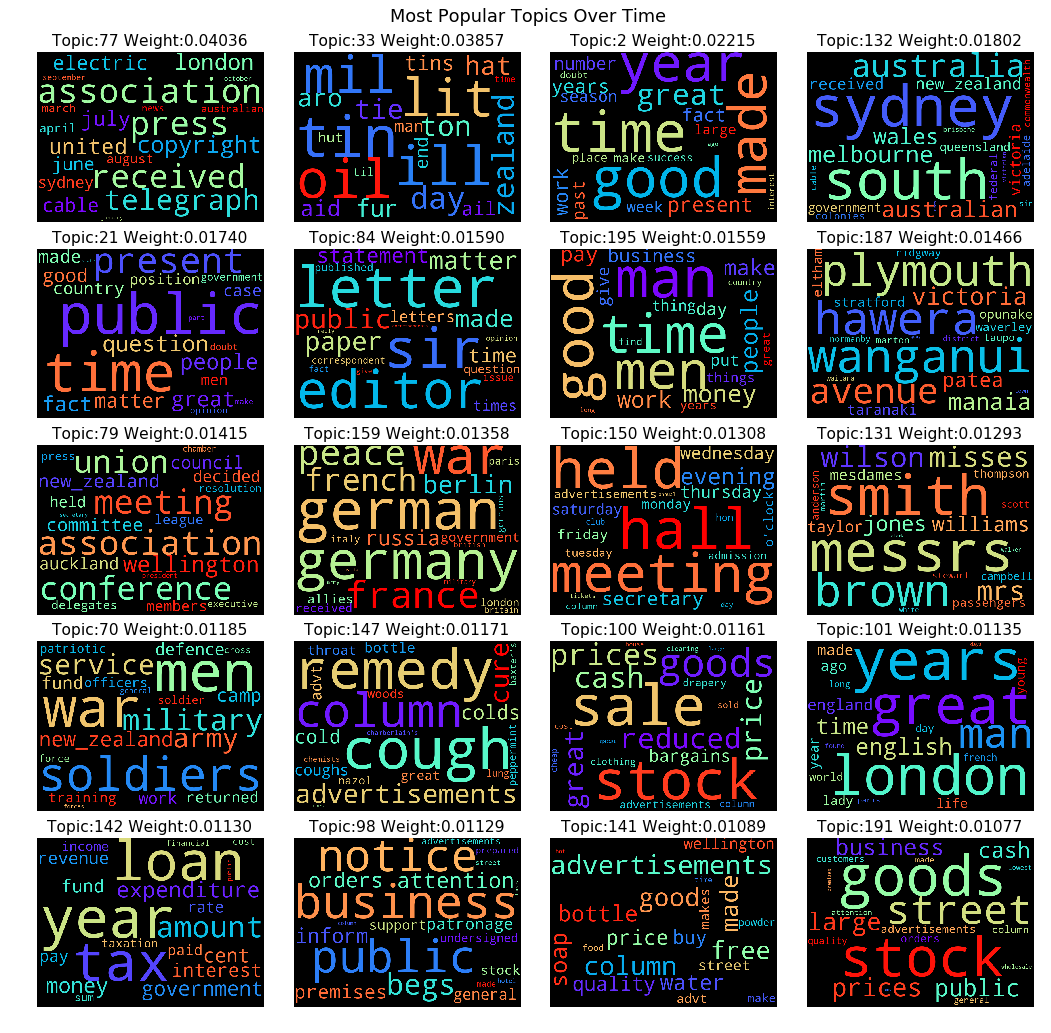

In [11]:
df_plt = df_topics.copy(deep=True).sort_values(by='weight', ascending=False)

plot_wordcloud(df_plt, 20, 20, 4, path='../temp/plot_wordcloud.png')

### 3.2 Documents Distribution

**Before checking the topic distribution, we should take a look at the documents distribution.**

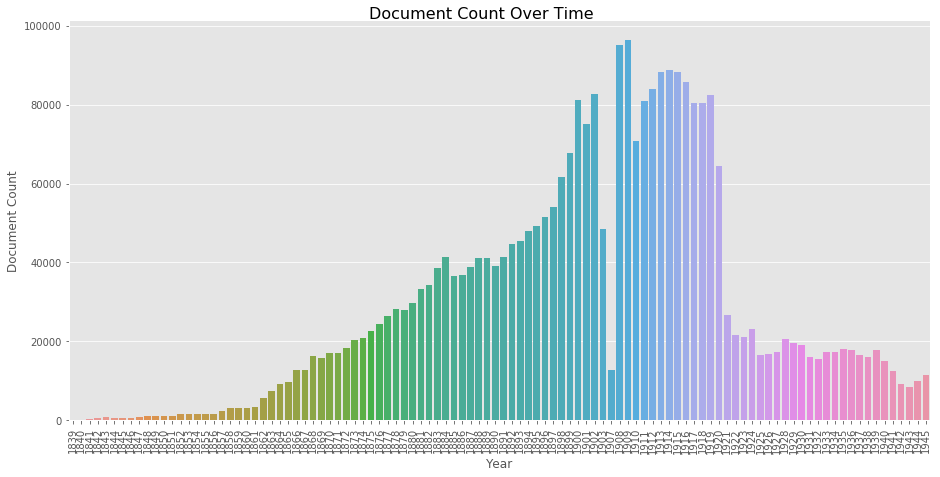

In [12]:
g = sns.catplot(x="year",
                kind='count', height=6.5, aspect=2, 
                dodge=False, legend=False, 
                data=df_domtopic)
g.fig.suptitle("Document Count Over Time", fontsize=16)
g.fig.subplots_adjust(top=0.95)
g.set(xlabel='Year', ylabel='Document Count')        
g.set_xticklabels(rotation=90, step=1)

### 3.3 Dominant Topics Distribution

**We plot all the dominant topics to glimpse the distribution in general, each point represents a document in a certainn year with certain dominant topic weight, the color changes over time.**

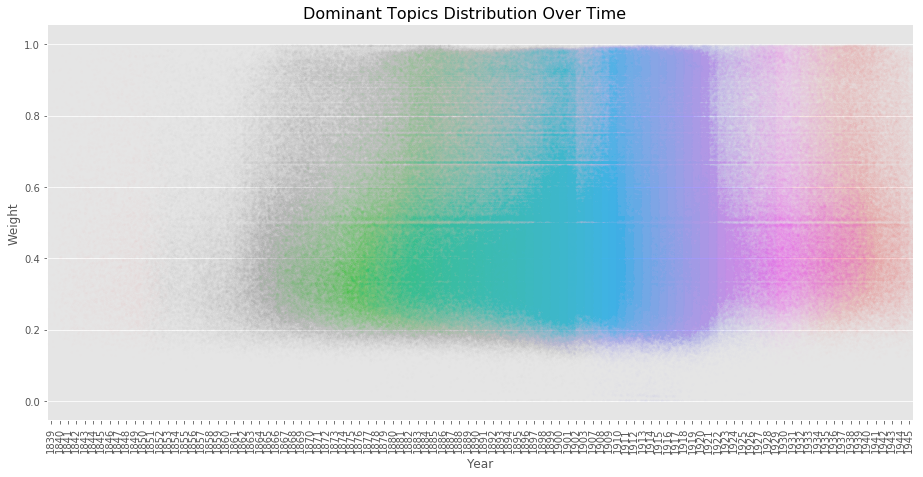

In [13]:
g = sns.catplot(x="year", y='weight',
                kind='strip', height=6.5, aspect=2, 
                jitter=2, dodge=False, 
                s=3, alpha=0.004,
                legend=False,
                data=df_domtopic)

g.fig.subplots_adjust(top=0.94)
g.fig.suptitle("Dominant Topics Distribution Over Time", fontsize=16)
g.set(xlabel='Year', ylabel='Weight')
g.set_xticklabels(rotation=90)

### 3.4 Annual Average Weight Distribution

**We plot all the annual average weight to see the general distribution:**

In [14]:
df_plt = df_avgweight[['year', 'topic', 'weight']]

df_plt = pd.pivot_table(data=df_plt,
                        index='topic',
                        values='weight',
                        columns='year')
scaler = MinMaxScaler()
df_plt_scaled = pd.DataFrame(scaler.fit_transform(df_plt),columns = df_plt.columns)
df_plt.head()

year       1839      1840      1841      1842      1843      1844      1845  \
topic                                                                         
0      0.000022  0.000081  0.000270  0.000472  0.000157  0.000616  0.000282   
1      0.000425  0.000503  0.000333  0.000590  0.000844  0.000305  0.000884   
2      0.000911  0.001999  0.004577  0.007803  0.006000  0.005266  0.012652   
3      0.000013  0.000763  0.000861  0.004253  0.002466  0.001138  0.006959   
4      0.000030  0.004680  0.001153  0.002530  0.003183  0.001683  0.003486   

year       1846      1847      1848      1849      1850      1851      1852  \
topic                                                                         
0      0.000230  0.000704  0.000440  0.000394  0.000306  0.000340  0.000685   
1      0.001308  0.000399  0.000223  0.000602  0.000258  0.000373  0.000296   
2      0.005027  0.005006  0.005479  0.006844  0.005857  0.007383  0.007212   
3      0.002579  0.001636  0.001218  0.002733  0.002590  0.002712  0.003814   
4      0.006039  0.005057  0.003675  0.002324  0.005989  0.004916  0.003042   

year       1853      1854      1855      1856      1857      1858      1859  \
topic                                                                         
0      0.000698  0.000197  0.000274  0.000244  0.000524  0.000451  0.000802   
1      0.000696  0.000368  0.000242  0.000234  0.000275  0.000262  0.000449   
2      0.009742  0.004862  0.008156  0.006929  0.010789  0.009751  0.010080   
3      0.002096  0.001259  0.000836  0.002024  0.003135  0.005846  0.004190   
4      0.005192  0.001692  0.002366  0.002706  0.004664  0.004596  0.003403   

year       1860      1861      1862      1863      1864      1865      1866  \
topic                                                                         
0      0.000467  0.000534  0.000764  0.000905  0.000799  0.000837  0.001010   
1      0.000828  0.000409  0.000438  0.000457  0.000512  0.000887  0.000888   
2      0.010110  0.009226  0.009443  0.010268  0.010517  0.009100  0.009065   
3      0.007184  0.004613  0.006127  0.005429  0.005269  0.006224  0.008407   
4      0.003165  0.004317  0.006112  0.006264  0.004596  0.006609  0.005184   

year       1867      1868      1869      1870      1871      1872      1873  \
topic                                                                         
0      0.002043  0.001154  0.001104  0.001740  0.001237  0.000863  0.001033   
1      0.001179  0.000729  0.000836  0.000823  0.001327  0.001013  0.000828   
2      0.009334  0.008351  0.009646  0.009341  0.007727  0.008748  0.008242   
3      0.007609  0.008323  0.007268  0.008017  0.006476  0.006784  0.005346   
4      0.004246  0.005223  0.005126  0.005617  0.006927  0.005225  0.005241   

year       1874      1875      1876      1877      1878      1879      1880  \
topic                                                                         
0      0.001512  0.001617  0.002872  0.004281  0.004100  0.003346  0.003508   
1      0.001298  0.001260  0.001327  0.001422  0.001341  0.001102  0.001619   
2      0.007895  0.008845  0.007838  0.007663  0.007088  0.007506  0.007536   
3      0.006355  0.006143  0.006924  0.006313  0.005549  0.005390  0.005856   
4      0.005408  0.007283  0.007697  0.006970  0.005759  0.007906  0.009214   

year       1881      1882      1883      1884      1885      1886      1887  \
topic                                                                         
0      0.003576  0.003660  0.002813  0.003203  0.003460  0.002923  0.003003   
1      0.001521  0.001247  0.001468  0.001667  0.001813  0.002013  0.002295   
2      0.007868  0.008459  0.008569  0.007830  0.008505  0.009338  0.008646   
3      0.005680  0.005091  0.005931  0.005574  0.004960  0.006112  0.005488   
4      0.008826  0.013847  0.012790  0.013565  0.010387  0.014249  0.012215   

year       1888      1889      1890      1891      1892      1893      1894  \
topic                                      

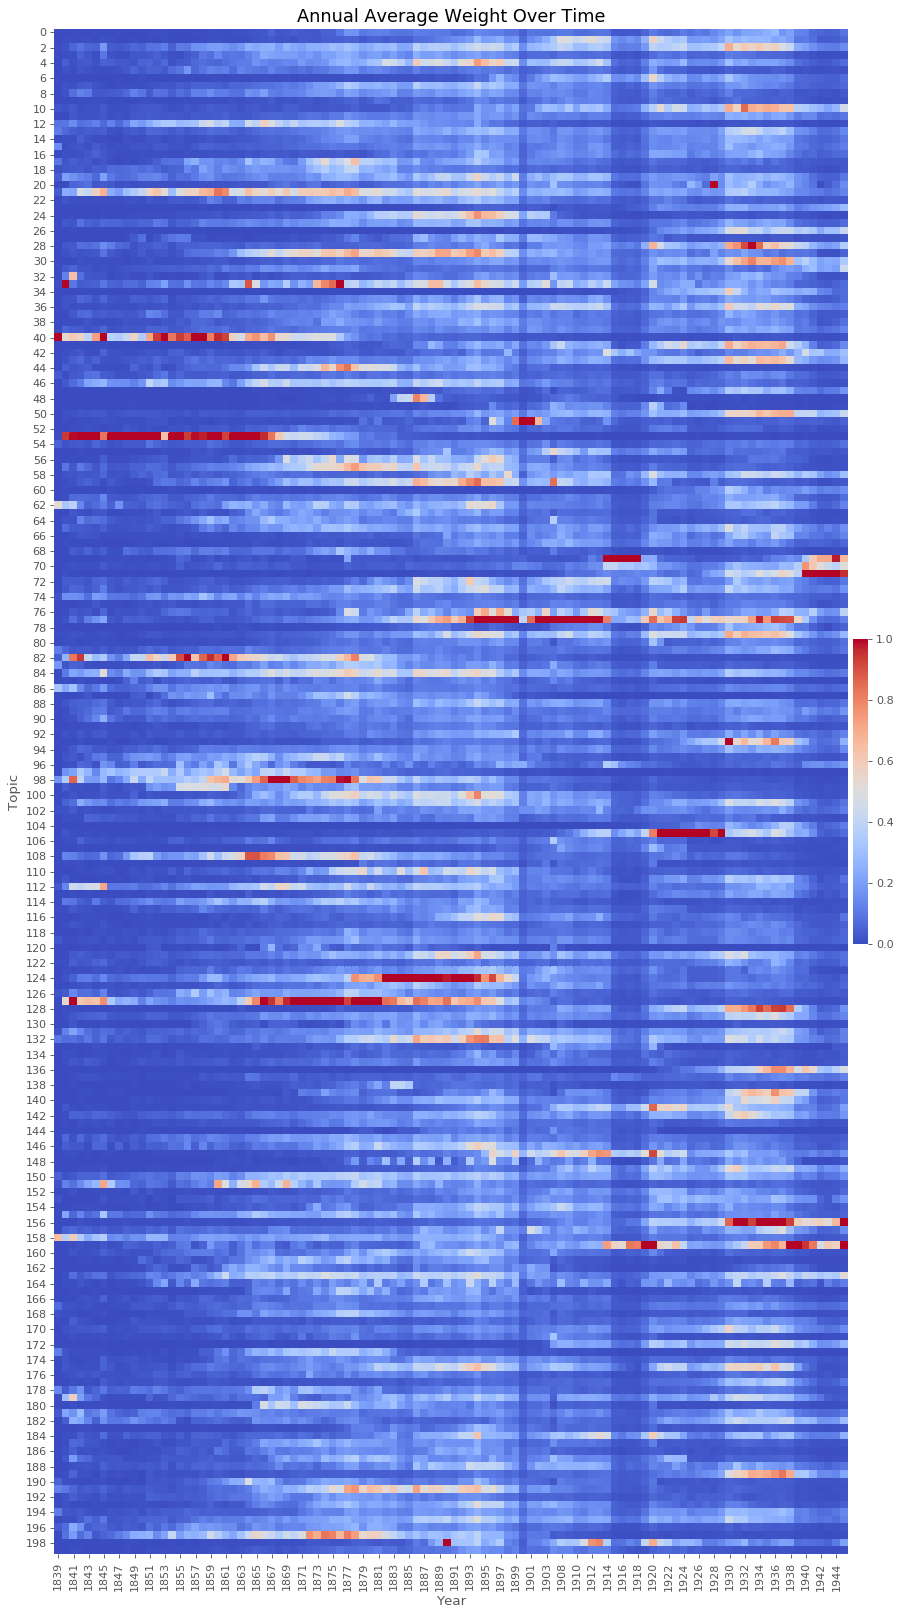

In [15]:
plot_heatmap(df_plt_scaled)

### 3.5 Annual Average Weight of Each Topic

**Plot all topics average weight to check trend of each topic.**

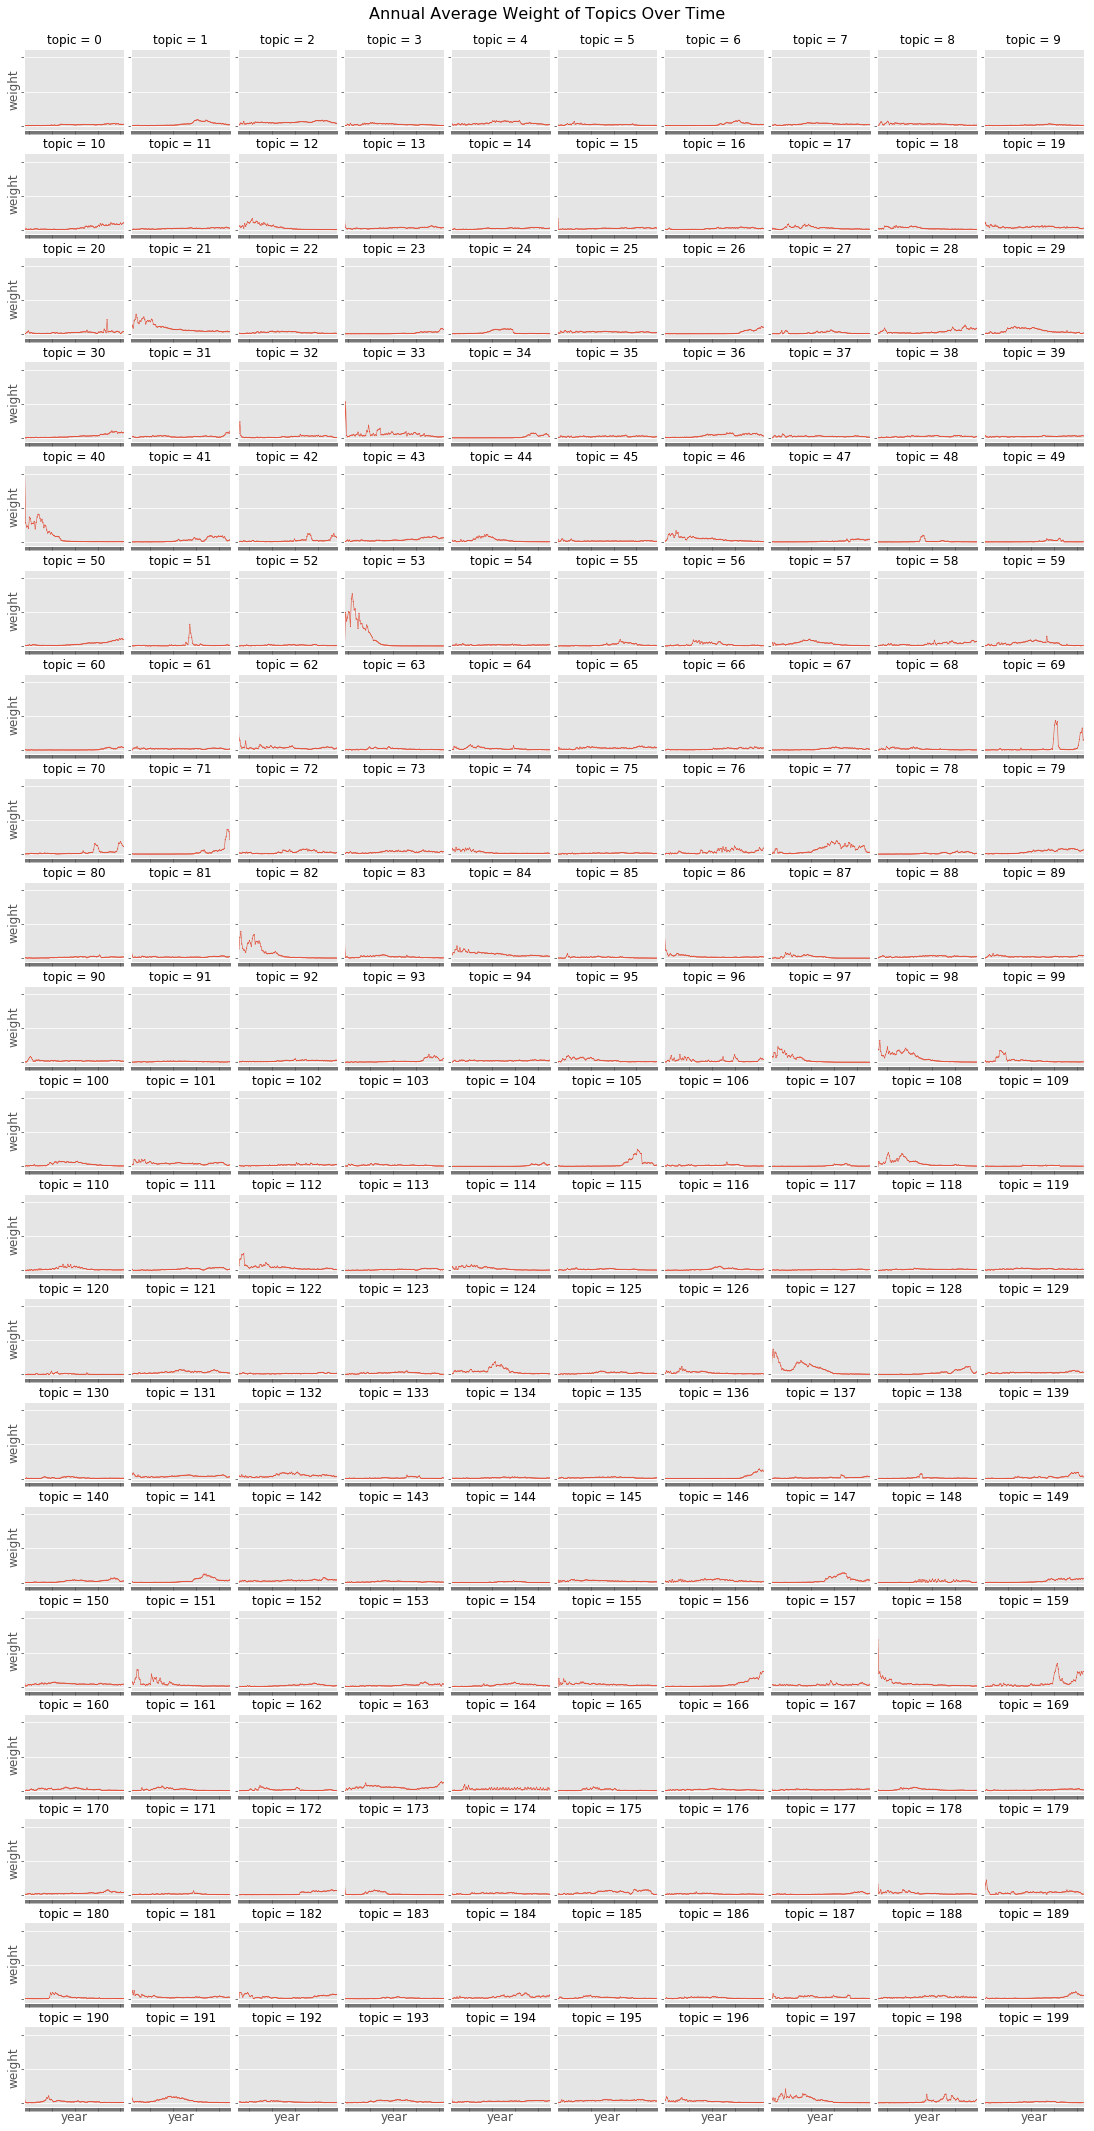

In [16]:
plot_avg(df_avgweight)

## 4 The First 10 Topics

**Before we try to find topics with specific features, we plot the first 10 topics to see the situation:**

**Generate dominant topics dataframe for plot:**

In [17]:
topic_list = list(range(10))

print('List of topics to plot:', topic_list)

df_plt_dom = filter_topics(df_domtopic, topic_list)
df_plt_avg = filter_topics(df_avgweight, topic_list)

print('Shape of df_plt_dom:', df_plt_dom.shape)
print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = df_col_order.keywords.str.slice(0,60)+'...'
df_col_order.head(10)

List of topics to plot: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Shape of df_plt_dom: (167701, 6)
Shape of df_plt_avg: (1040, 4)


weight  \
topic            
0      0.00657   
1      0.01074   
2      0.02215   
3      0.00384   
4      0.00901   
5      0.00515   
6      0.00972   
7      0.00761   
8      0.00759   
9      0.00479   

                                                                                                                      keywords  
topic                                                                                                                           
0      train railway leave trains station passengers return dep day tickets service stations express run railways fares spe...  
1      prices advertisements column suit latest ladies suits made street quality goods good wear style special styles fit c...  
2       time good year made great present work years fact number past season week large make place success doubt interest ago   
3      plaintiff defendant claim court costs judgment case witness evidence paid amount pay appeared gave made plaintiffs c...  
4      found death body deceased man inquest dead named evidence witness died suicide morning murder wife returned house ve...  
5      sale harness horses horse draught farm cows stock good cattle mare dairy plough sell cart years spring gelding instr...  
6      motor masterton street car cycle phone cars prices advertisements tyres column price cycles good agents call stock g...  
7      board committee meeting chairman report received messrs letter resolved present held read decided matter reported mo...  
8      goods books fancy christmas stock cases large sets presents xmas assortment cards prices toys variety boxes statione...  
9      hotel proprietor house accommodation rooms hot private visitors mrs day tariff baths moderate telephone good late st...

**Dominant topics distribution by year:**

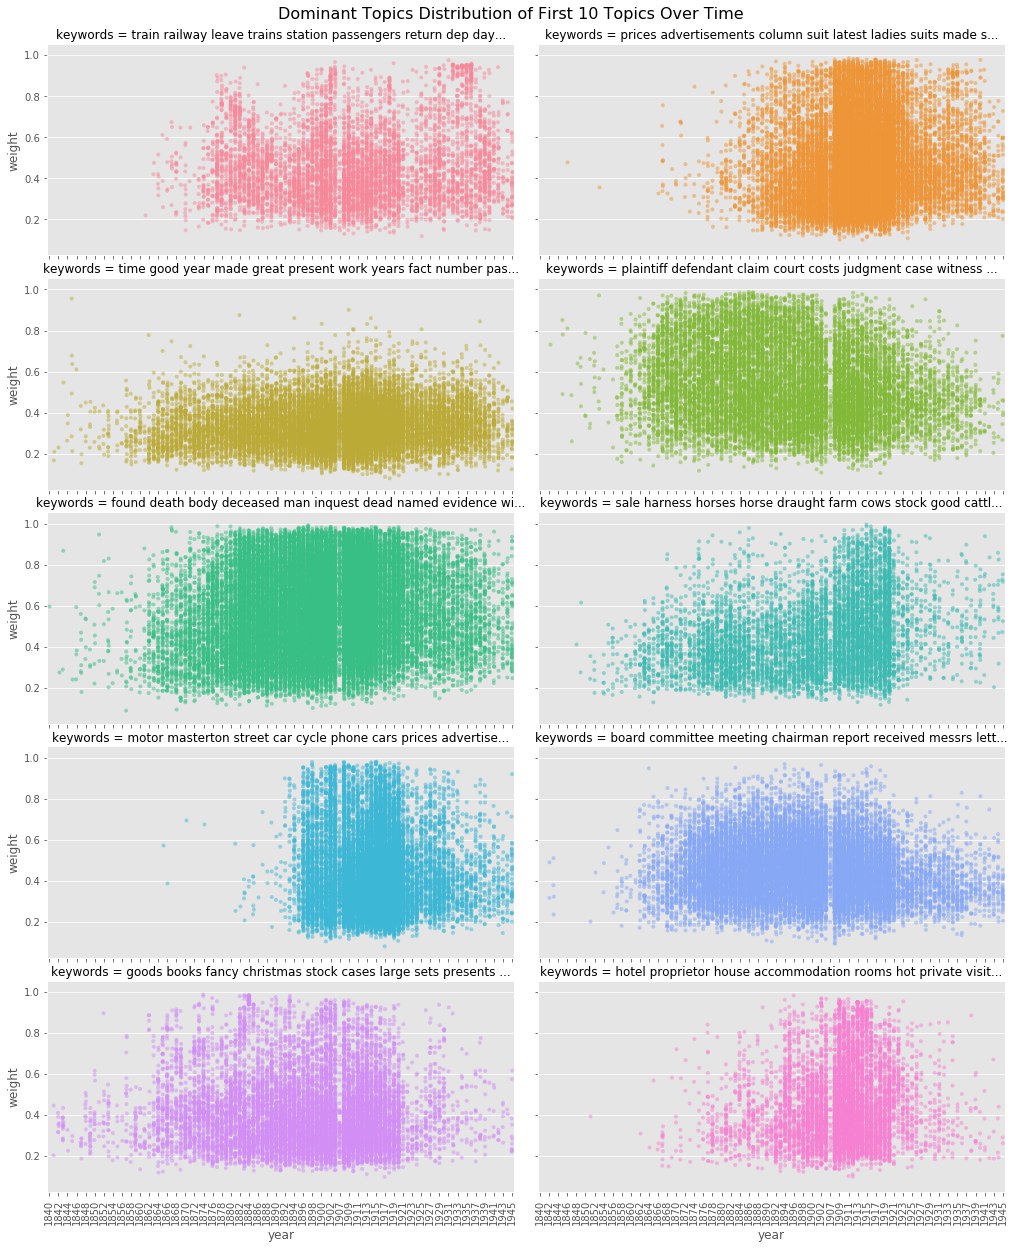

In [18]:
plot_topics(df_plt_dom, 
            'scatter', 
            col_order=col_order,
            adjust_top=0.95,
            title='First 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Dominant topics count by year:**

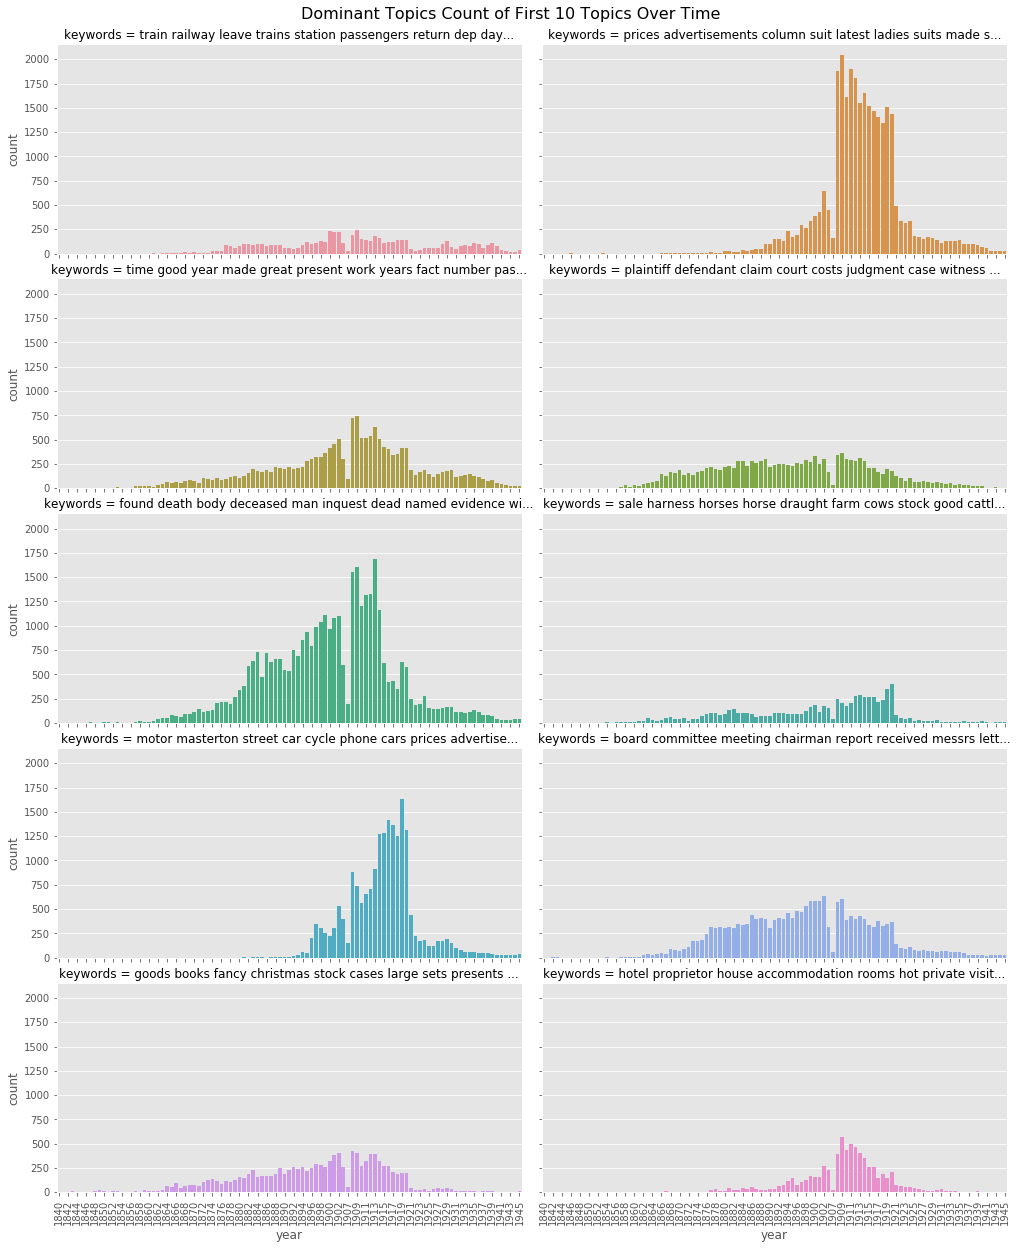

In [19]:
plot_topics(df_plt_dom, 
            'bar', 
            col_order=col_order,
            adjust_top=0.95,
            title='First 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Average topic weight by year:**

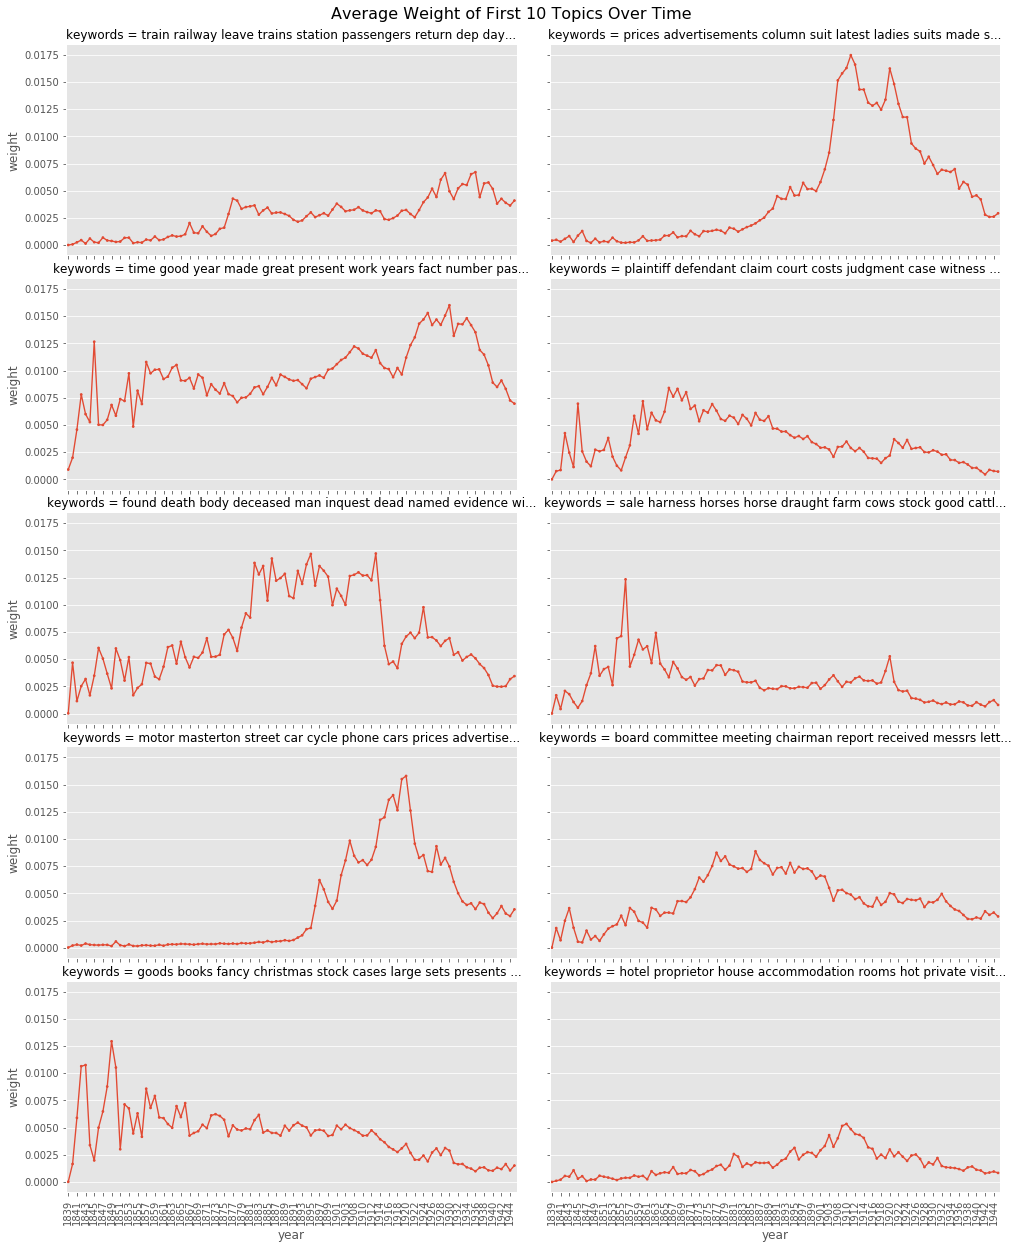

In [20]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.95,
            title='First 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

## 5 The Most Variant Topics

**By caculating the standard deviation of average weight of each topic, we get the most variant topics. Some weights of topic may vary following the overall trends, it's better to remove the effect of overall trend for more accurate evaluation. Here we ignore the effect of overall trends.**

In [21]:
topic_list = list(df_avgweight.groupby('topic')['weight']
                  .std().sort_values(ascending=False).index[:10])

print('List of topics to plot:', topic_list)

df_plt_dom = filter_topics(df_domtopic, topic_list)
df_plt_avg = filter_topics(df_avgweight, topic_list)

print('Shape of df_plt_dom:', df_plt_dom.shape)
print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = df_col_order.keywords.str.slice(0,60)+'...'
df_col_order.head(10)

List of topics to plot: [53, 40, 82, 69, 127, 158, 159, 98, 71, 21]
Shape of df_plt_dom: (252089, 6)
Shape of df_plt_avg: (1040, 4)


weight  \
topic            
53     0.00348   
40     0.00566   
82     0.00688   
69     0.00744   
127    0.00831   
158    0.00872   
159    0.01358   
98     0.01129   
71     0.00452   
21     0.01740   

                                                                                                                      keywords  
topic                                                                                                                           
53     cases ditto sale casks boxes oil case white brandy foot ale tea sugar cwt assorted bags undersigned candles cubic iron   
40     government provincial province council colony general superintendent public governor new_zealand colonial assembly h...  
82     sale apply land acres house particulars property terms town good sections situated lease section years farm road fre...  
69     german enemy germans front french british london fighting troops attack captured received line artillery russian sta...  
127    arrived tons port wellington sailed auckland schooner cargo yesterday melbourne left barque passengers lyttelton syd...  
158    land country colony new_zealand great people large government population years settlement present settlers system st...  
159    german germany war france peace french berlin russia government allies received london paris italy germans britain b...  
98     business public notice begs attention orders inform premises patronage general support stock undersigned advertiseme...  
71     air flying flight london aeroplane british aircraft machine miles bombs aeroplanes force enemy raid japanese machine...  
21     public time present question people great fact matter good made country case men position government doubt opinion m...

**Dominant topics distribution by year:**

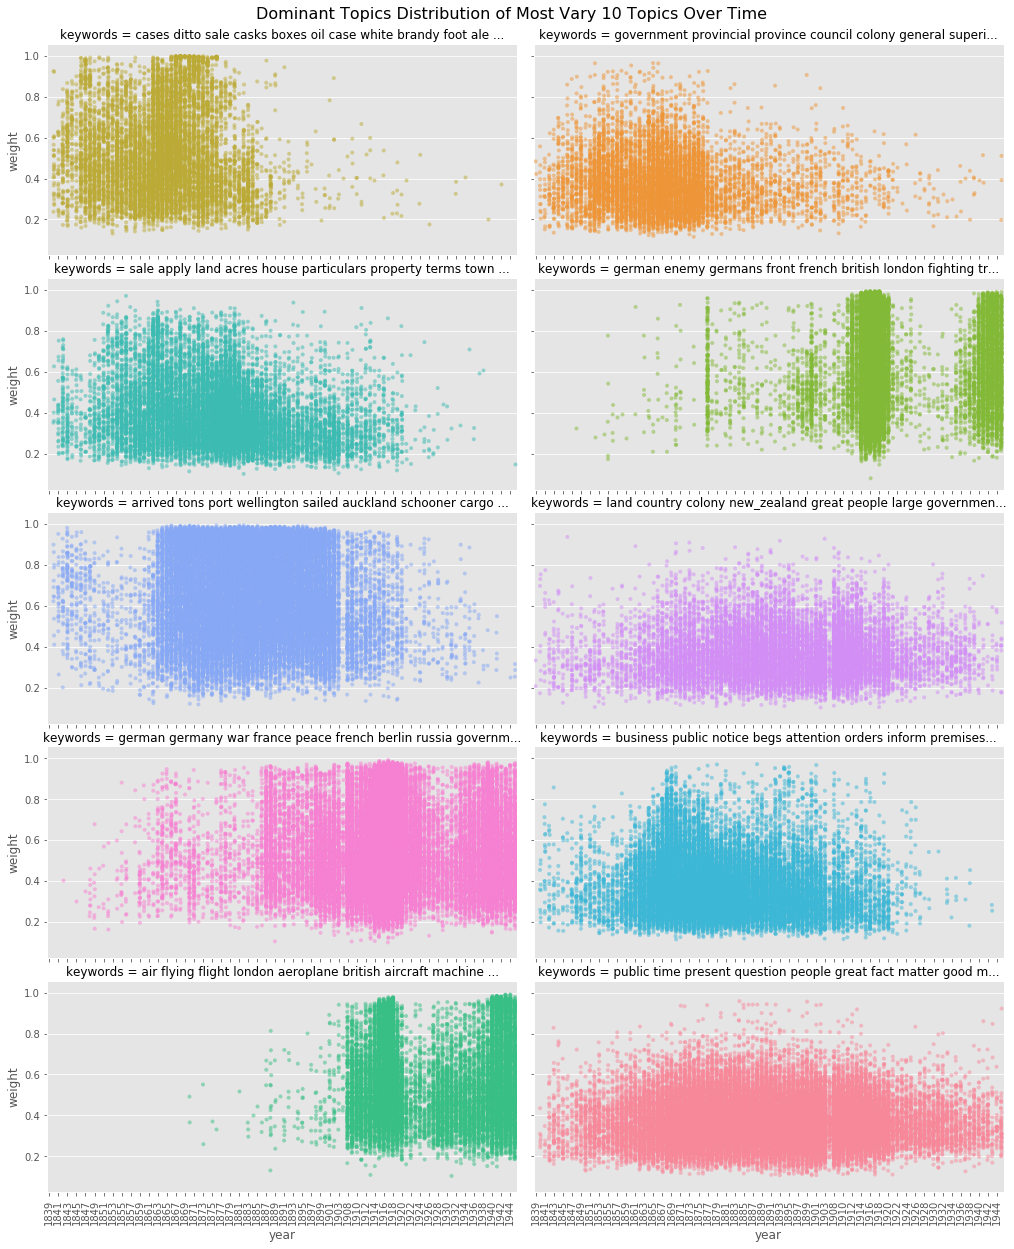

In [22]:
plot_topics(df_plt_dom, 
            'scatter', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Vary 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Dominant topics count by year:**

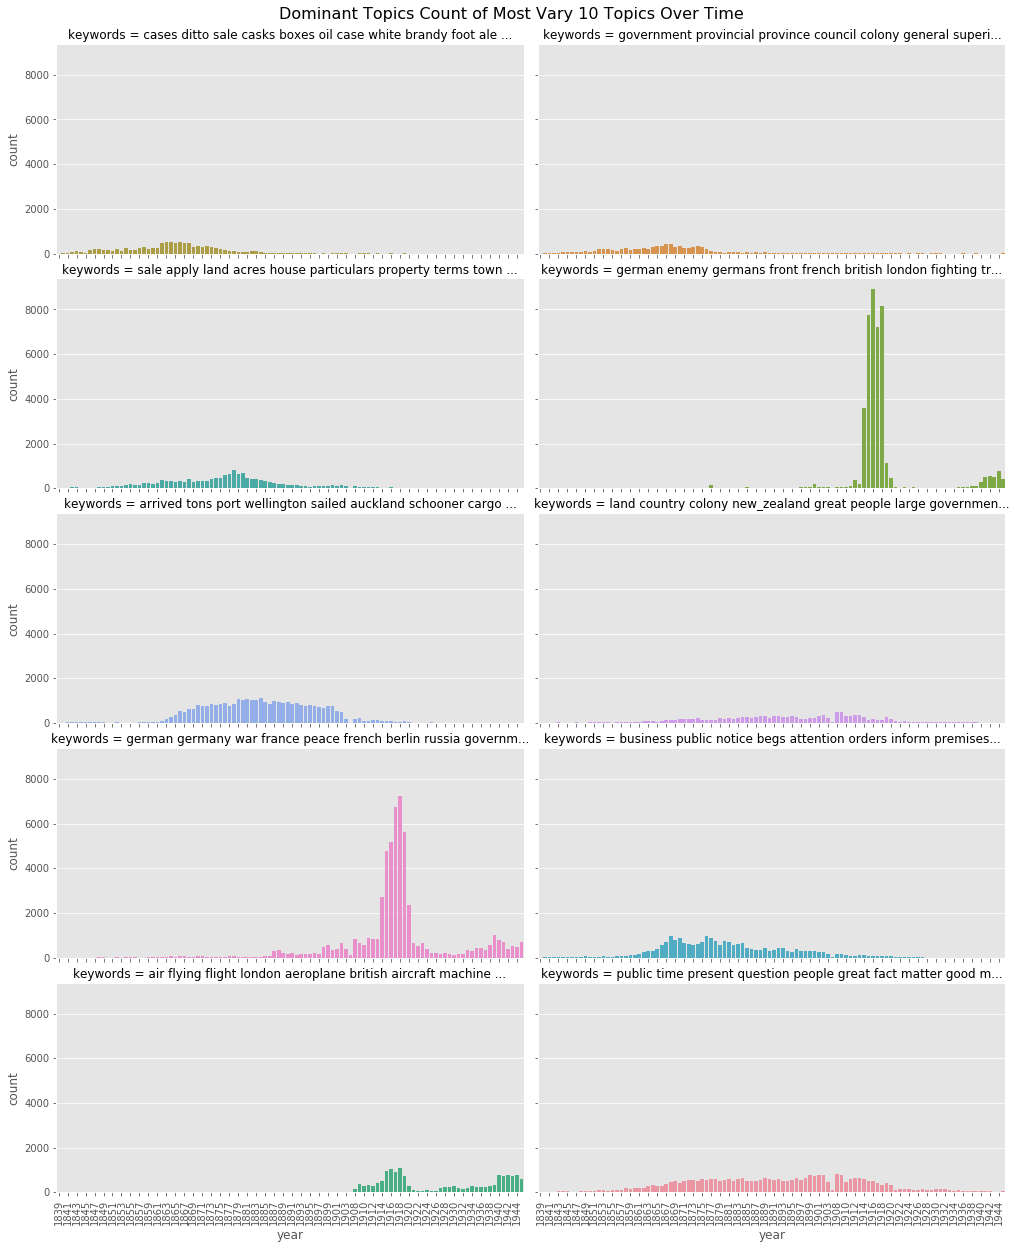

In [23]:
plot_topics(df_plt_dom, 
            'bar', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Vary 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Average topic weight by year:**

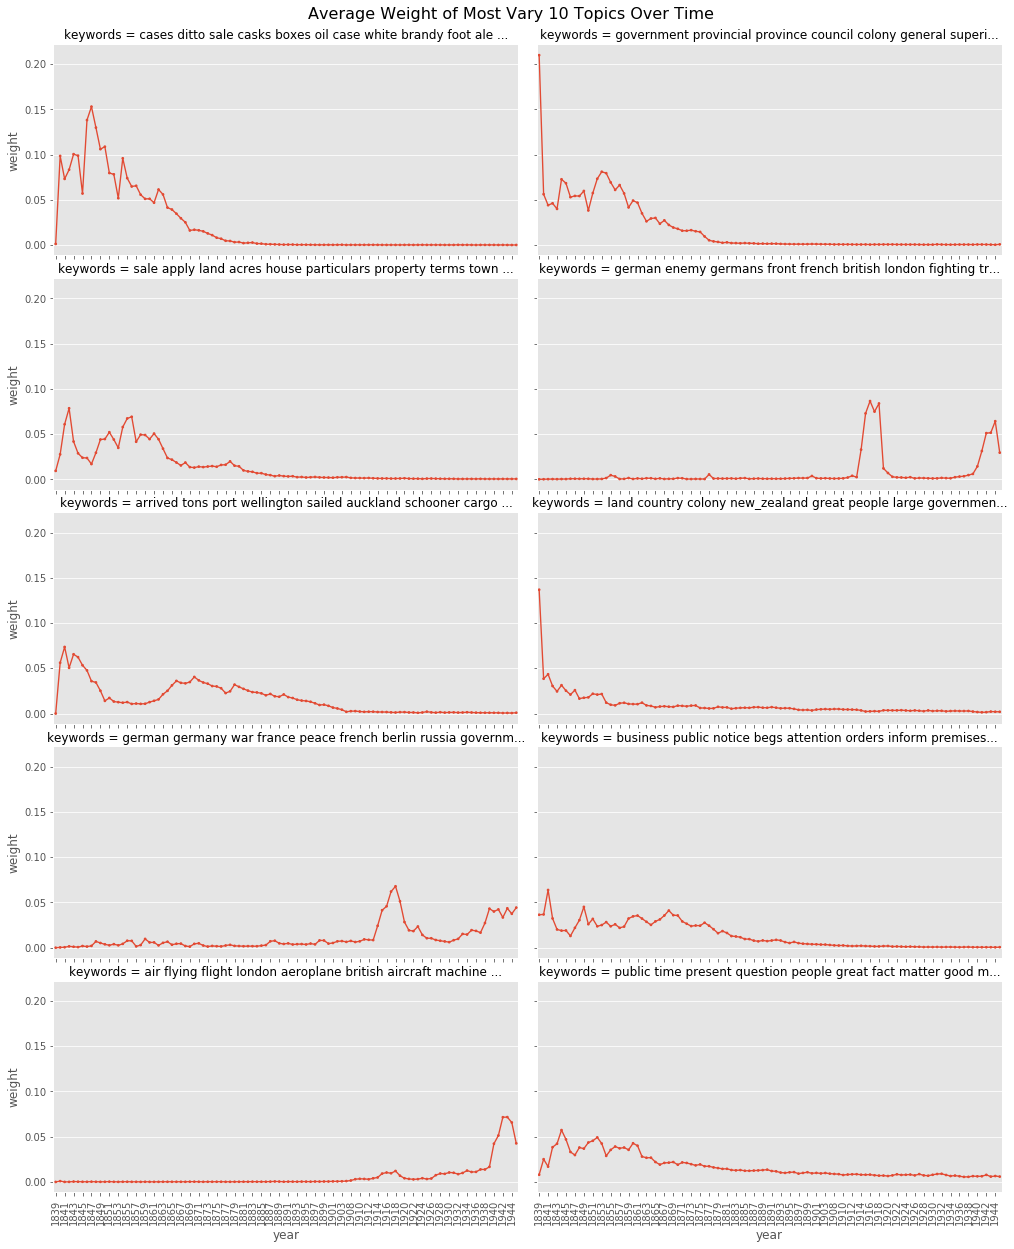

In [24]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Vary 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

## 6 The Most Significant Topics

**Variance dose not consider the document number, if a topic has high variance but the support documents are few, the topic is not significant. To find significant, we use the figure that dominant topic count multiply the average weight of the topic, this figure considers both the number of support document and the average weight of topic. This way magnifies the topics that are dominant topics of documents, we take it as significant topics.**

In [25]:
df_domtopic_count = (df_domtopic.groupby(['year', 'topic'])
                     .size().reset_index(name='count')
                     .sort_values(['year', 'topic']))
df_domtopic_count.columns = ['year_', 'topic_', 'count']

df_signif = df_avgweight.copy(deep=True)

df_signif = (df_signif
             .merge(df_domtopic_count, left_on=['year', 'topic'], right_on=['year_', 'topic_'], how='outer')
             .sort_values(by=['year', 'topic'])
             .drop(columns=['keywords', 'year_', 'topic_'])
             .reset_index(drop=True)
             .fillna(0))

df_signif['value'] = df_signif['weight'] * df_signif['count']

topic_list = list(df_signif.groupby('topic')['value'].std().sort_values(ascending=False).index[:10])

print('List of topics to plot:', topic_list)

df_plt_dom = filter_topics(df_domtopic, topic_list)
df_plt_avg = filter_topics(df_avgweight, topic_list)

print('Shape of df_plt_dom:', df_plt_dom.shape)
print('Shape of df_plt_avg:', df_plt_avg.shape)

df_col_order = filter_topics(df_topics, topic_list).set_index('topic')
df_col_order = df_col_order.loc[topic_list]
col_order = df_col_order.keywords.str.slice(0,60)+'...'
df_col_order.head(10)

List of topics to plot: [69, 159, 51, 147, 77, 124, 70, 105, 198, 141]
Shape of df_plt_dom: (353741, 6)
Shape of df_plt_avg: (1040, 4)


weight  \
topic            
69     0.00744   
159    0.01358   
51     0.00626   
147    0.01171   
77     0.04036   
124    0.00914   
70     0.01185   
105    0.00663   
198    0.00768   
141    0.01089   

                                                                                                                      keywords  
topic                                                                                                                           
69     german enemy germans front french british london fighting troops attack captured received line artillery russian sta...  
159    german germany war france peace french berlin russia government allies received london paris italy germans britain b...  
51     south africa boers british war general transvaal contingent boer london lord received african cape capetown men troo...  
147    cough remedy column advertisements cure colds cold coughs advt bottle throat great woods nazol peppermint lung baxte...  
77     association press received telegraph copyright london united july electric cable june sydney august april march aust...  
124    london government british french foreign sir england news lord paris received france english general india march gre...  
70     men war soldiers military service army new_zealand camp fund defence work returned training officers patriotic soldi...  
105    theatre picture pictures story programme to-night drama film comedy love star shown great girl play life feature nig...  
198    strike union men miners labour work workers coal federation association conference labor dispute unions wages strike...  
141    advertisements column good free made soap bottle water price quality buy wellington street makes advt make powder fo...

**Dominant topics distribution by year:**

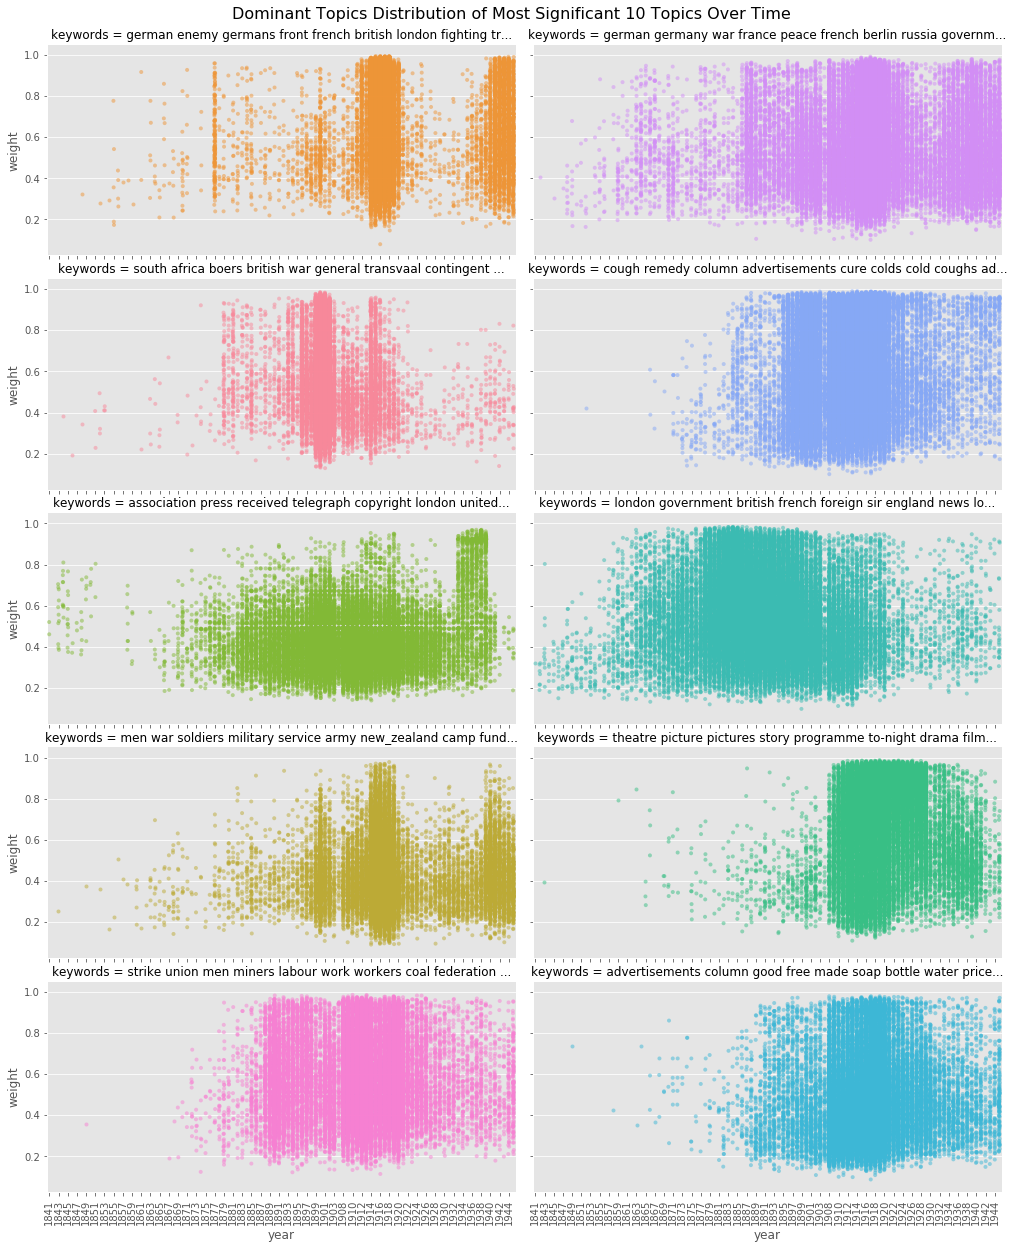

In [26]:
plot_topics(df_plt_dom, 
            'scatter', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Significant 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Dominant topics count by year:**

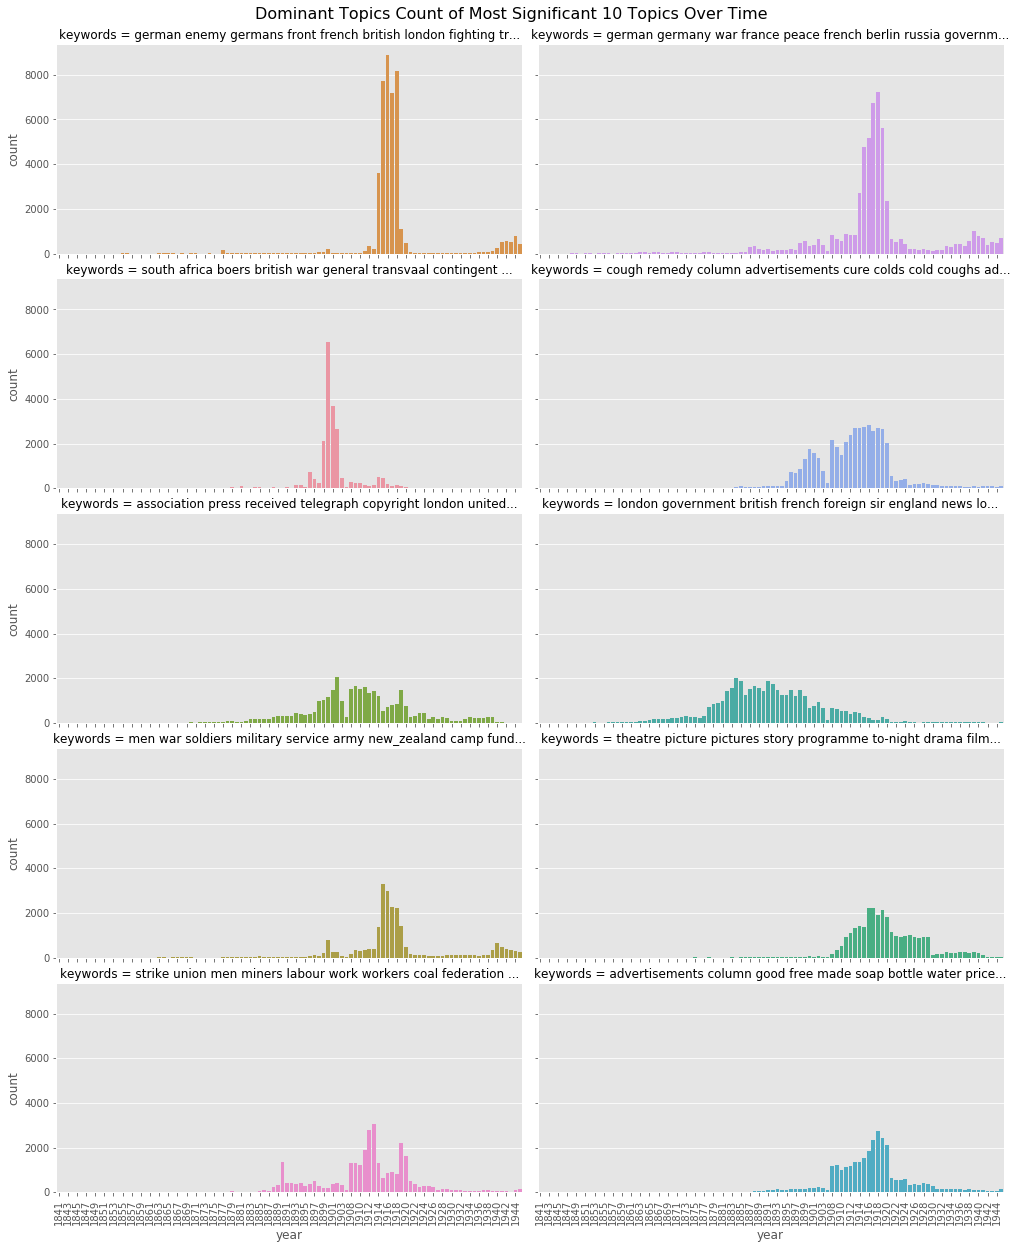

In [27]:
plot_topics(df_plt_dom, 
            'bar', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Significant 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

**Average topic weight by year:**

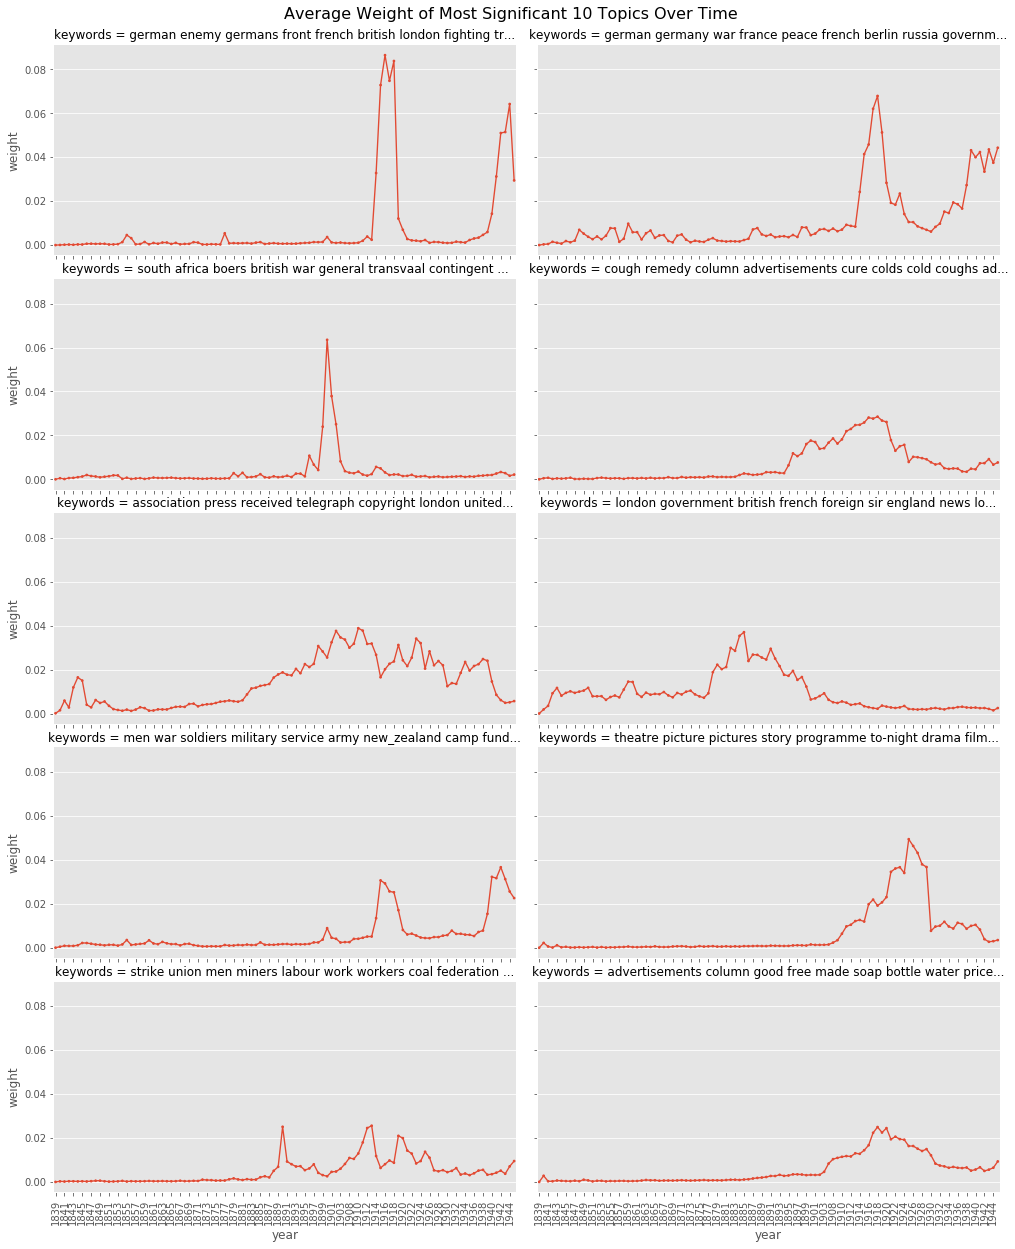

In [28]:
plot_topics(df_plt_avg, 
            'point', 
            col_order=col_order,
            adjust_top=0.95,
            title='Most Significant 10 Topics Over Time',
            height=3.5,
            col_wrap=2)

---

In [29]:
gc.collect()

230